# Financial News Sentiment Analysis
Classify the sentiment of financial news headlines as positive, neutral, or negative using classical machine learning and neural network methods.

# Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
import visual
import preprocessing
import loader
import utils

In [3]:
pd.set_option('display.max_colwidth',200)

# Load Dataset

In [8]:
data_path = "../data/Sentences_50Agree.txt"
text_column = "news"
sentiment_col = "sentiment"

In [10]:
%%time
corpora = loader.load_data(data_path=data_path, text_column=text_column, sentiment_col=sentiment_col)

Skipped 0 lines without labels.
CPU times: user 6.91 ms, sys: 3.24 ms, total: 10.2 ms
Wall time: 10 ms


In [12]:
corpora.sample(10) #3477

news  \
3696                                                                                                                                                                   No planned closing date was provided .   
2250                                                        Under the agreement , TietoEnator will provide Blyk with extended application and business process management services and an IT infrastructure .   
3573                                                                                                                             Earnings per share EPS in the first quarter amounted to a loss of EUR0 .20 .   
392                                                                                                                      The Finnish company Stockmann has signed the contract with the company Technopolis .   
2109                                   For Q2 2010 , consolidated earnings before tax totaled EUR4 .5 m , compared to EUR3 .9 m , and net profit was EUR3 .2 m , compared to EUR2 .9 m in the previous year .   
1639  The new system , which will include 60 MC3090 PDAs from Motorola , to be used by 60 Poundstretcher operatives across 3 shifts , will integrate in real-time with the company s existing Warehouse Ma...   
2621                                                                                                                               The deal is subject to approval by the Norwegian competition authorities .   
2131                                                                                   It also said its third quarter diluted EPS came in at 0.34 eur compared with 0.16 eur in the same quarter a year ago .   
2342                                                                    Ahlstrom 's 5,700 employees serve customers via sales offices and production facilities in more than 20 countries on six continents .   
2025         Latin America currently accounts for approximately 40 % of sales at Finnish BSS-OSS and VAS supplier for telecoms operators Tecnotree , company president and CEO Eero Mertano told BNamericas .   

     sentiment  
3696   neutral  
2250  positive  
3573   neutral  
392    neutral  
2109  positive  
1639   neutral  
2621   neutral  
2131  positive  
2342   neutral  
2025   neutral

## Task1: Extract insights from data

In [15]:
corpora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       4846 non-null   object
 1   sentiment  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [17]:
corpora.isna().sum()

news         0
sentiment    0
dtype: int64

### simple preprocessing
Applies simple preprocessing to the target column for statistical analysis:

    - Lowercase
    - Remove punctuation
    - Remove stopwords

In [20]:
simple_cleaned_corpora, clean_column_name = preprocessing.basic_clean_for_statistics(df=corpora, text_column=text_column)

In [22]:
simple_cleaned_corpora.sample(5)

news  \
1900                                                        Homeowners across North America have green experiences to share from cost savings to clean and eco-friendly heating .   
635   The Vuokatti unit will be developed to focus especially on the manufacture of prototypes , the ramp-up of new products and the demanding testing and after-sales services .   
2713                       Argentine agricultural export company Calafate has tapped compatriot firm Finnegans for a software solution , the latter company said in a statement .   
3974                                                      Vaisala 's expertise in lightning data and information systems is based on extensive experience and investment in R&D .   
4239                                                                               The adjustments concern staff in both the Specialty Papers and the Fiber Composites segments .   

     sentiment  \
1900   neutral   
635    neutral   
2713   neutral   
3974   neutral   
4239   neutral   

                                                                                                                           clean_news  
1900                                   homeowners across north america green experiences share cost savings clean ecofriendly heating  
635         vuokatti unit developed focus especially manufacture prototypes rampup new products demanding testing aftersales services  
2713  argentine agricultural export company calafate tapped compatriot firm finnegans software solution latter company said statement  
3974                                    vaisala expertise lightning data information systems based extensive experience investment rd  
4239                                                             adjustments concern staff specialty papers fiber composites segments

### Data Distribution
label_column:
neutral     2879 (59.41%)
positive    1363 (28.13%)
negative     604 (12.46)

In [25]:
simple_cleaned_corpora[sentiment_col].value_counts(normalize=True).mul(100).round(2)

sentiment
neutral     59.41
positive    28.13
negative    12.46
Name: proportion, dtype: float64

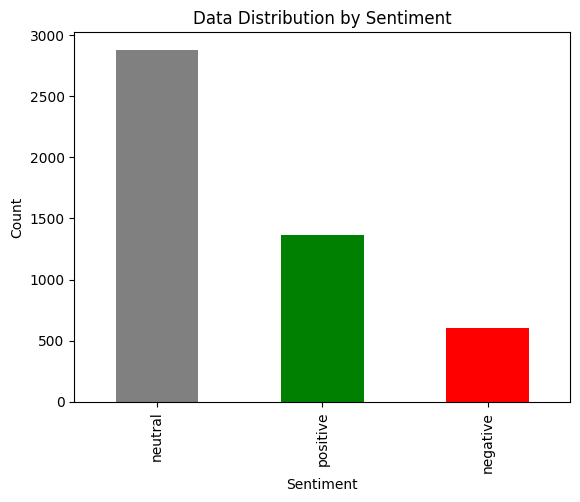

In [27]:
visual.plot_data_distribution_by_sentiment(df=simple_cleaned_corpora, sentiment_col=sentiment_col)

### Length Distribution by Class

In [30]:
text_length_col ="number_of_words_before_preprocessing"
text_length_col_after_simple ="number_of_words_after_simple_preprocessing"
simple_cleaned_corpora = utils.count_number_of_words(df=simple_cleaned_corpora,column_to_count=text_column, count_to=text_length_col)
simple_cleaned_corpora = utils.count_number_of_words(df=simple_cleaned_corpora,column_to_count=clean_column_name, count_to=text_length_col_after_simple)
simple_cleaned_corpora.head(5)

news  \
0                                                                          According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .   
1           Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .   
2  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...   
3  With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...   
4  According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ...   

  sentiment  \
0   neutral   
1   neutral   
2  negative   
3  positive   
4  positive   

                                                                                                                                                                         clean_news  \
0                                                                                                      according gran company plans move production russia although company growing   
1                              technopolis plans develop stages area less 100000 square meters order host companies working computer technologies telecommunications statement said   
2  international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported   
3                    new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability   
4                                   according company updated strategy years 20092012 basware targets longterm net sales growth range 20 40 operating profit margin 10 20 net sales   

   number_of_words_before_preprocessing  \
0                                    25   
1                                    31   
2                                    36   
3                                    33   
4                                    41   

   number_of_words_after_simple_preprocessing  
0                                          10  
1                                          18  
2                                          21  
3                                          20  
4                                          22

In [32]:
simple_cleaned_corpora["number_of_words_before_preprocessing"].describe().round(2)

count    4846.00
mean       23.10
std         9.96
min         2.00
25%        16.00
50%        21.00
75%        29.00
max        81.00
Name: number_of_words_before_preprocessing, dtype: float64

In [34]:
simple_cleaned_corpora["number_of_words_after_simple_preprocessing"].describe().round(2)

count    4846.00
mean       13.20
std         6.27
min         0.00
25%         9.00
50%        12.00
75%        17.00
max        47.00
Name: number_of_words_after_simple_preprocessing, dtype: float64

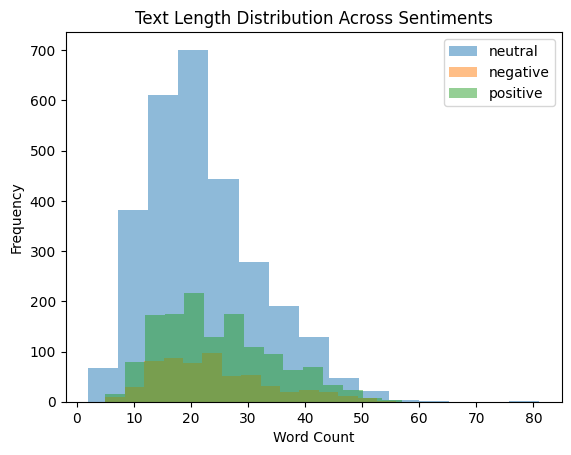

In [36]:
visual.plot_word_count_distribution_by_sentiment(df=simple_cleaned_corpora, text_length_col="number_of_words_before_preprocessing" , sentiment_col=sentiment_col)

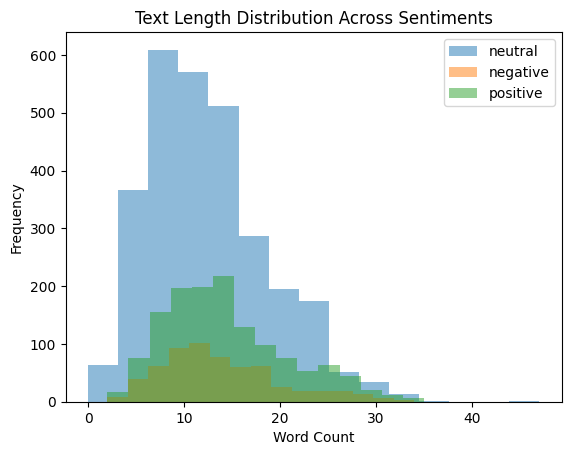

In [38]:
visual.plot_word_count_distribution_by_sentiment(df=simple_cleaned_corpora, text_length_col="number_of_words_after_simple_preprocessing" , sentiment_col=sentiment_col)

### Average Text Length 

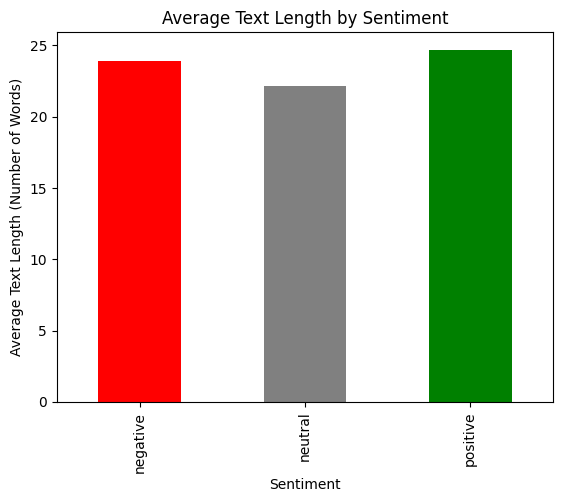

In [41]:
visual.plot_avg_word_count_by_sentiment(df=simple_cleaned_corpora, text_length_col="number_of_words_before_preprocessing", sentiment_col=sentiment_col)

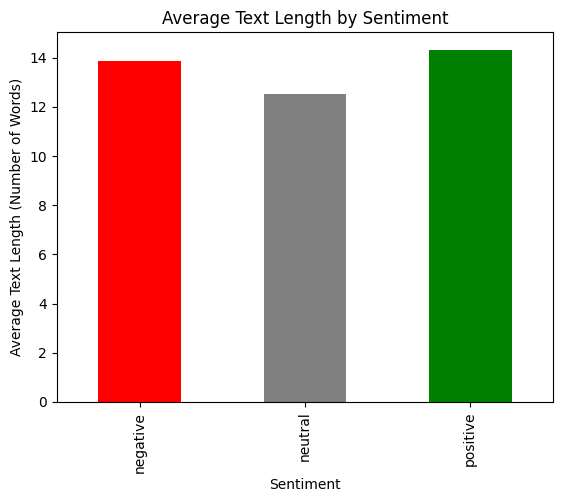

In [43]:
visual.plot_avg_word_count_by_sentiment(df=simple_cleaned_corpora, text_length_col="number_of_words_after_simple_preprocessing", sentiment_col=sentiment_col)

In [45]:
### Unique words

Unique words in sentiment 'neutral': 9686
Unique words in sentiment 'negative': 2870
Unique words in sentiment 'positive': 5742
Total unique words across all sentiments: 12971


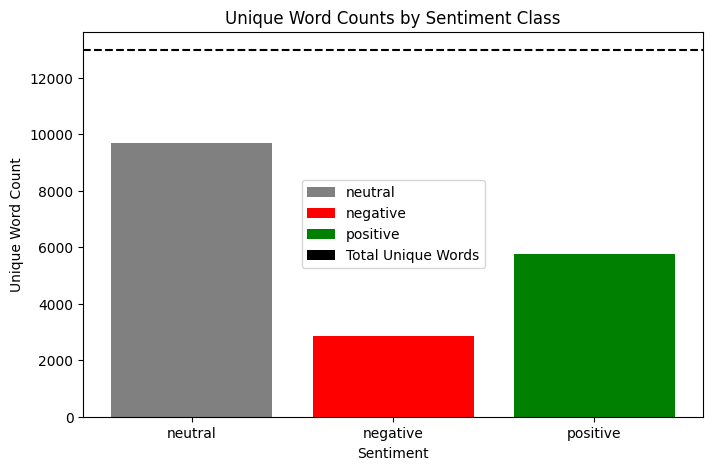

In [47]:
visual.plot_unique_words_by_sentiment(df=simple_cleaned_corpora, text_column=text_column, sentiment_col=sentiment_col)

Unique words in sentiment 'neutral': 8358
Unique words in sentiment 'negative': 2501
Unique words in sentiment 'positive': 5005
Total unique words across all sentiments: 11135


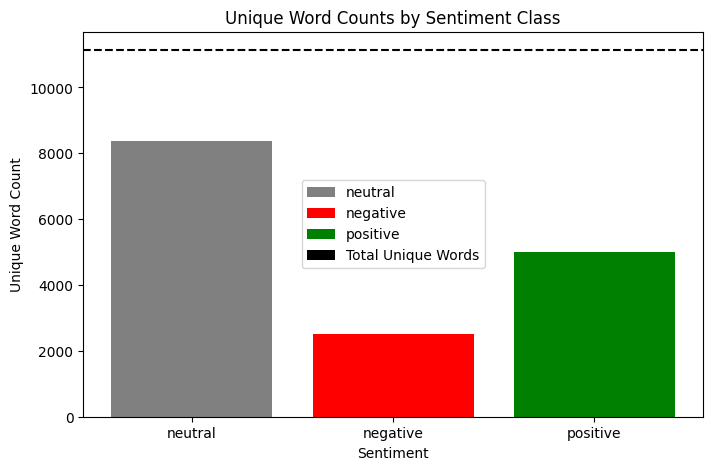

In [49]:
visual.plot_unique_words_by_sentiment(df=simple_cleaned_corpora, text_column=clean_column_name, sentiment_col=sentiment_col)

### Most Common Words per Class

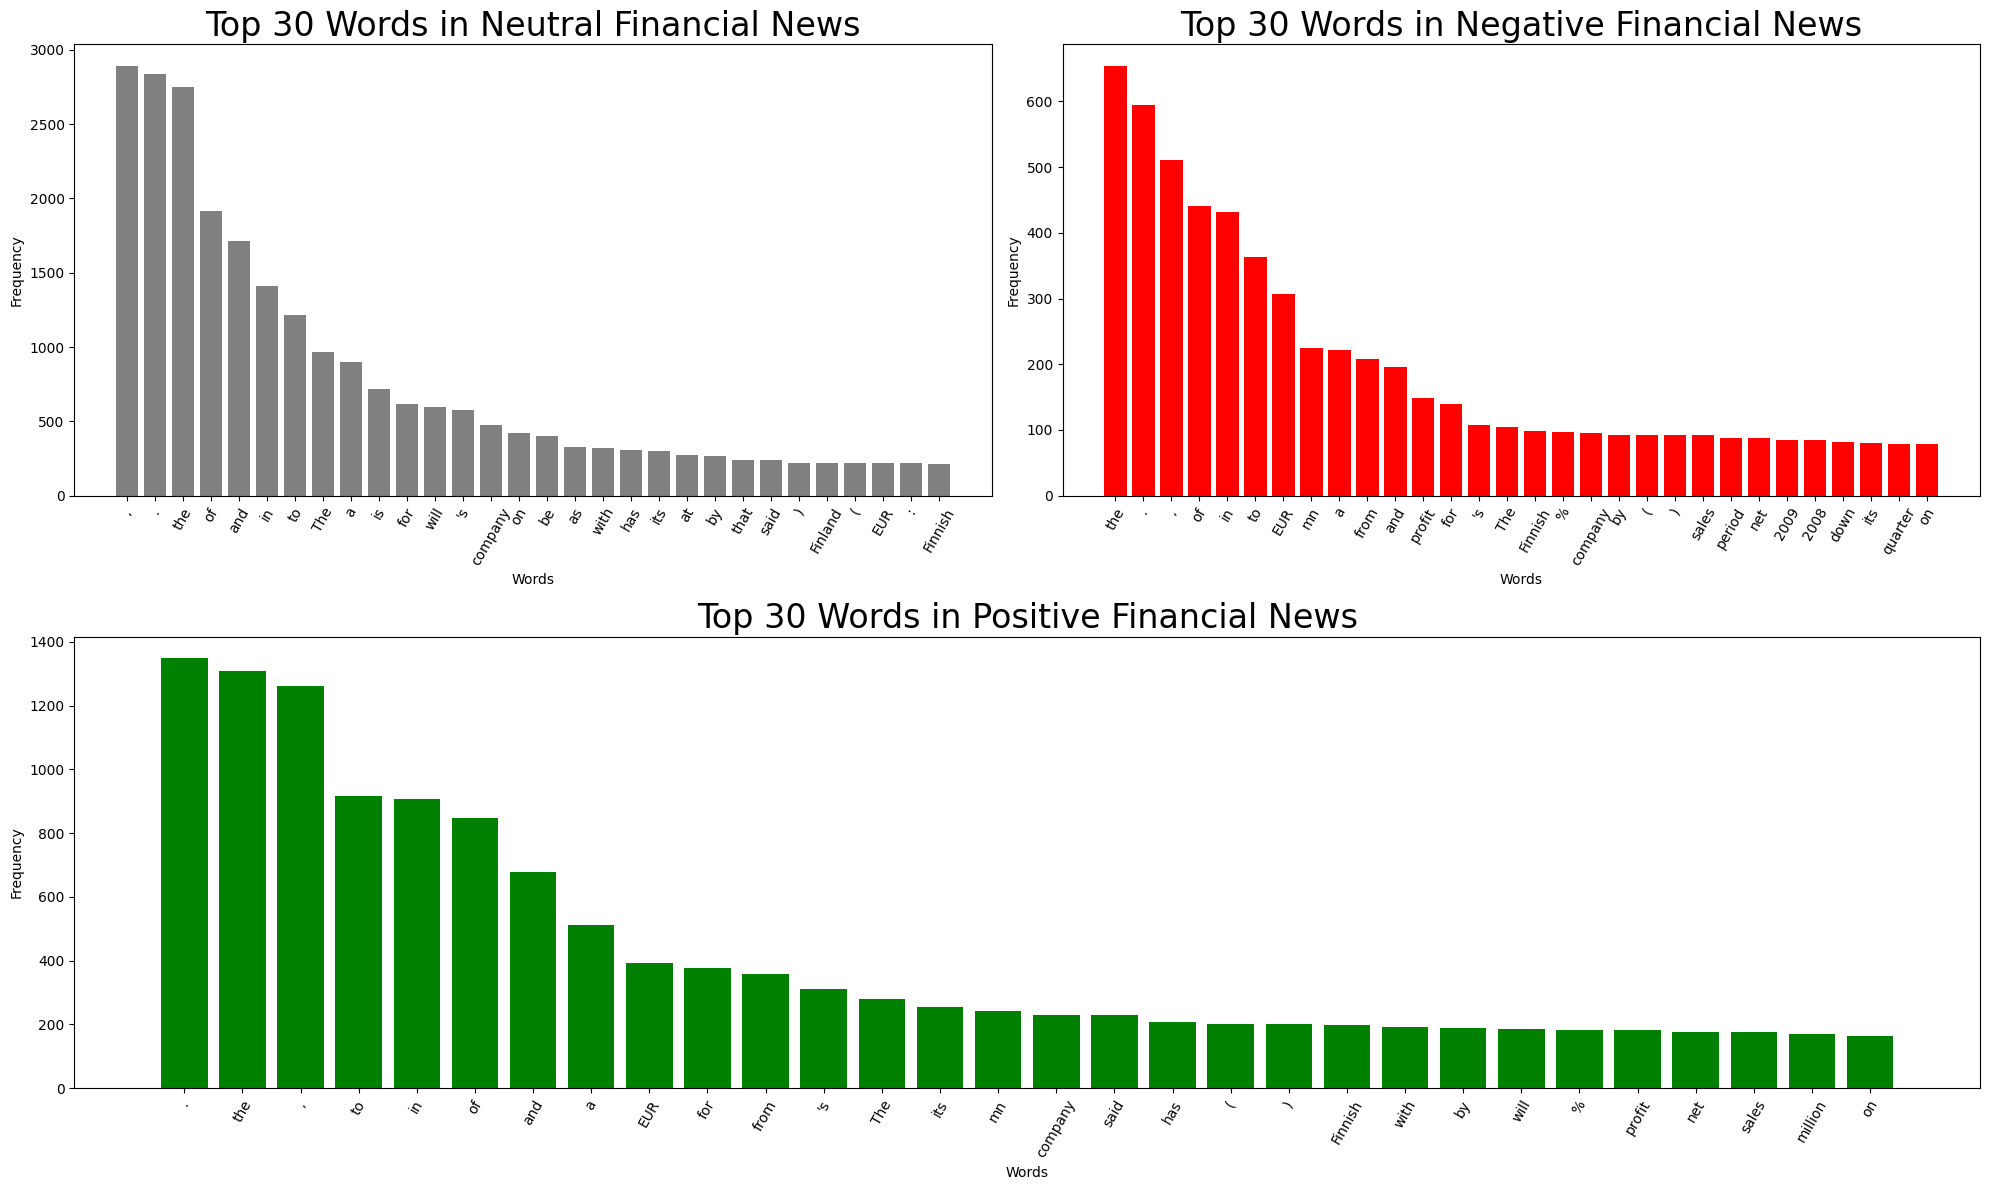

In [52]:
visual.plot_most_common_words_by_sentiment(df=simple_cleaned_corpora, text_column=text_column, sentiment_col=sentiment_col)

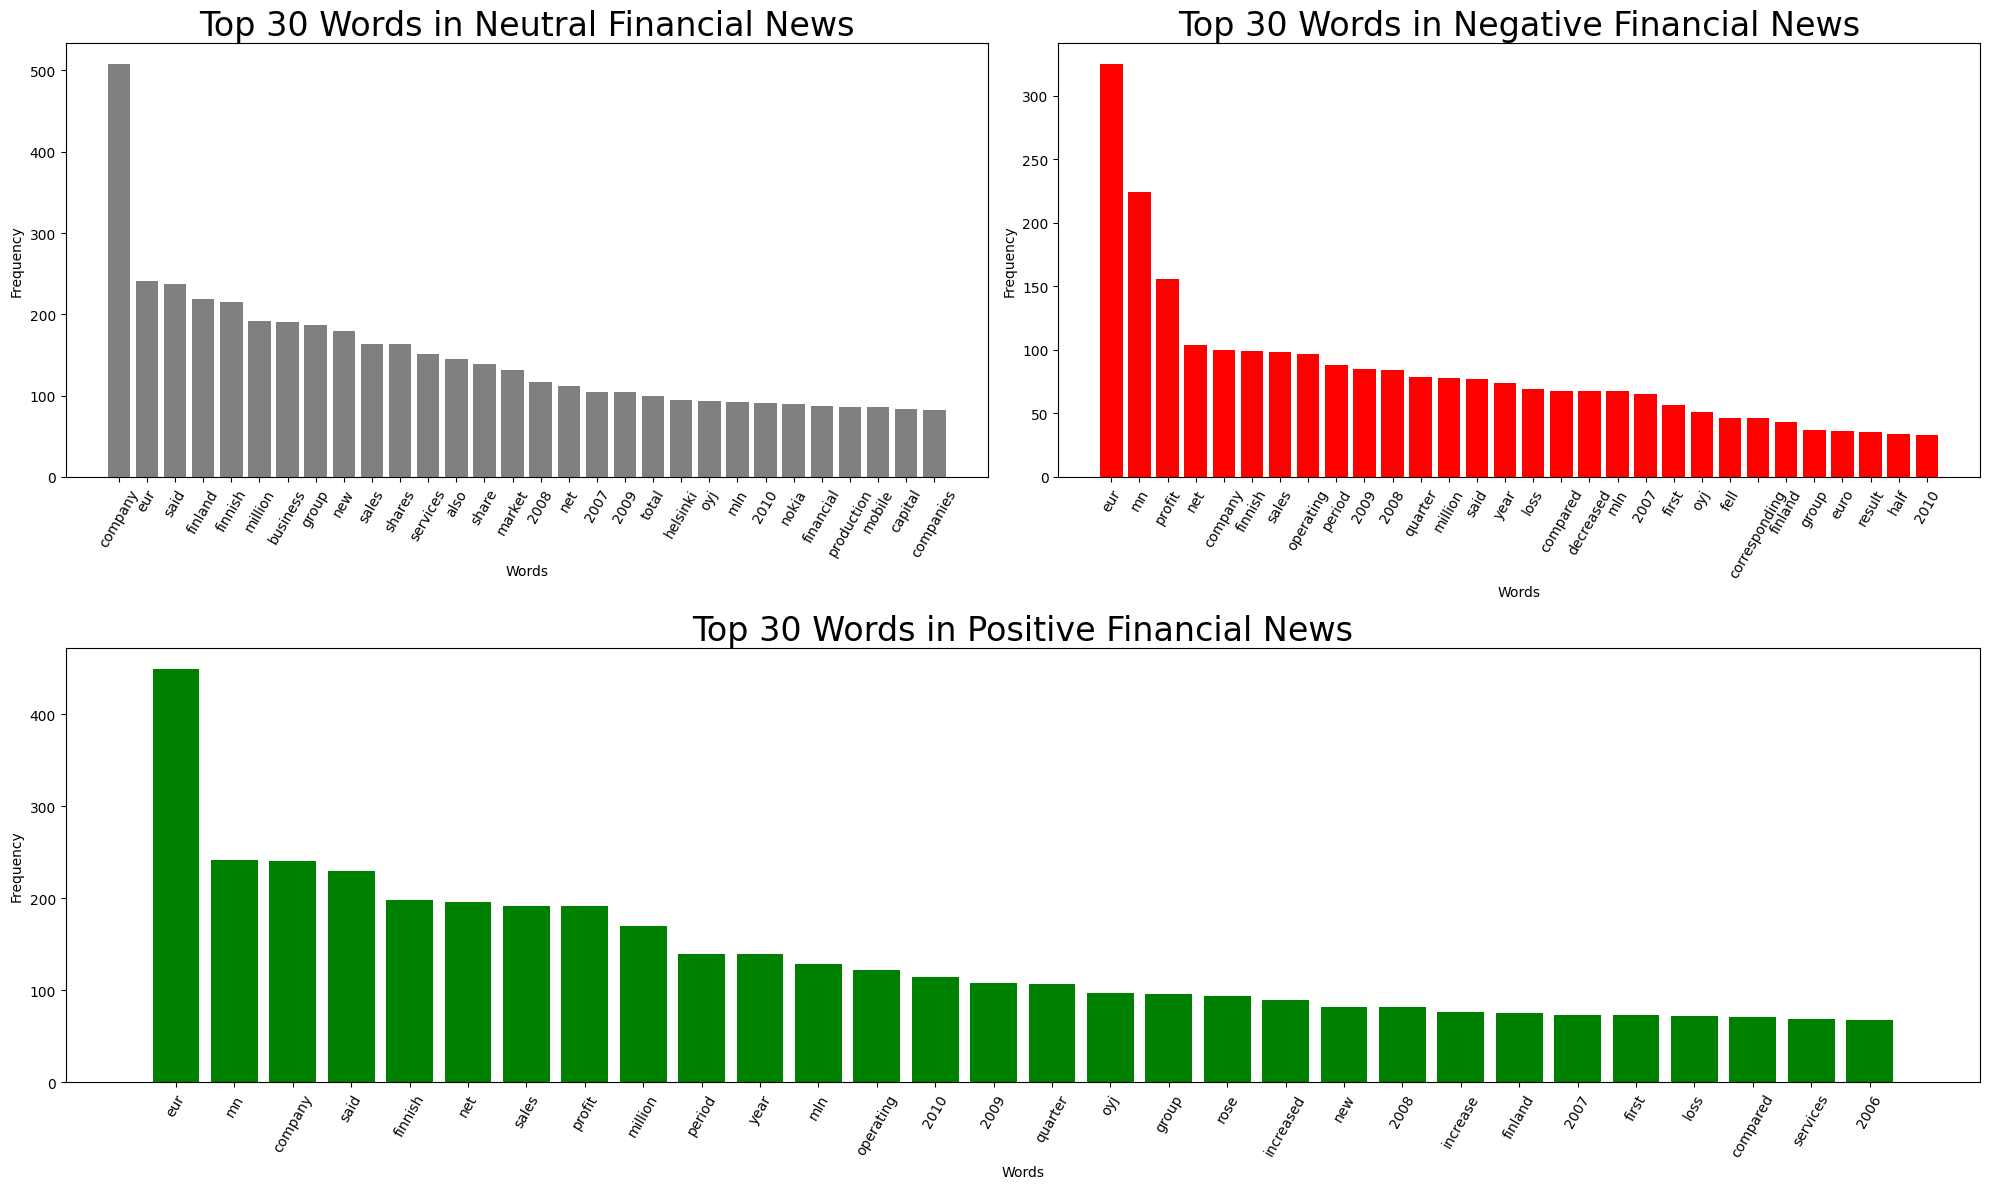

In [54]:
visual.plot_most_common_words_by_sentiment(df=simple_cleaned_corpora, text_column=clean_column_name, sentiment_col=sentiment_col)

### Word Cloud for each Sentiment Class

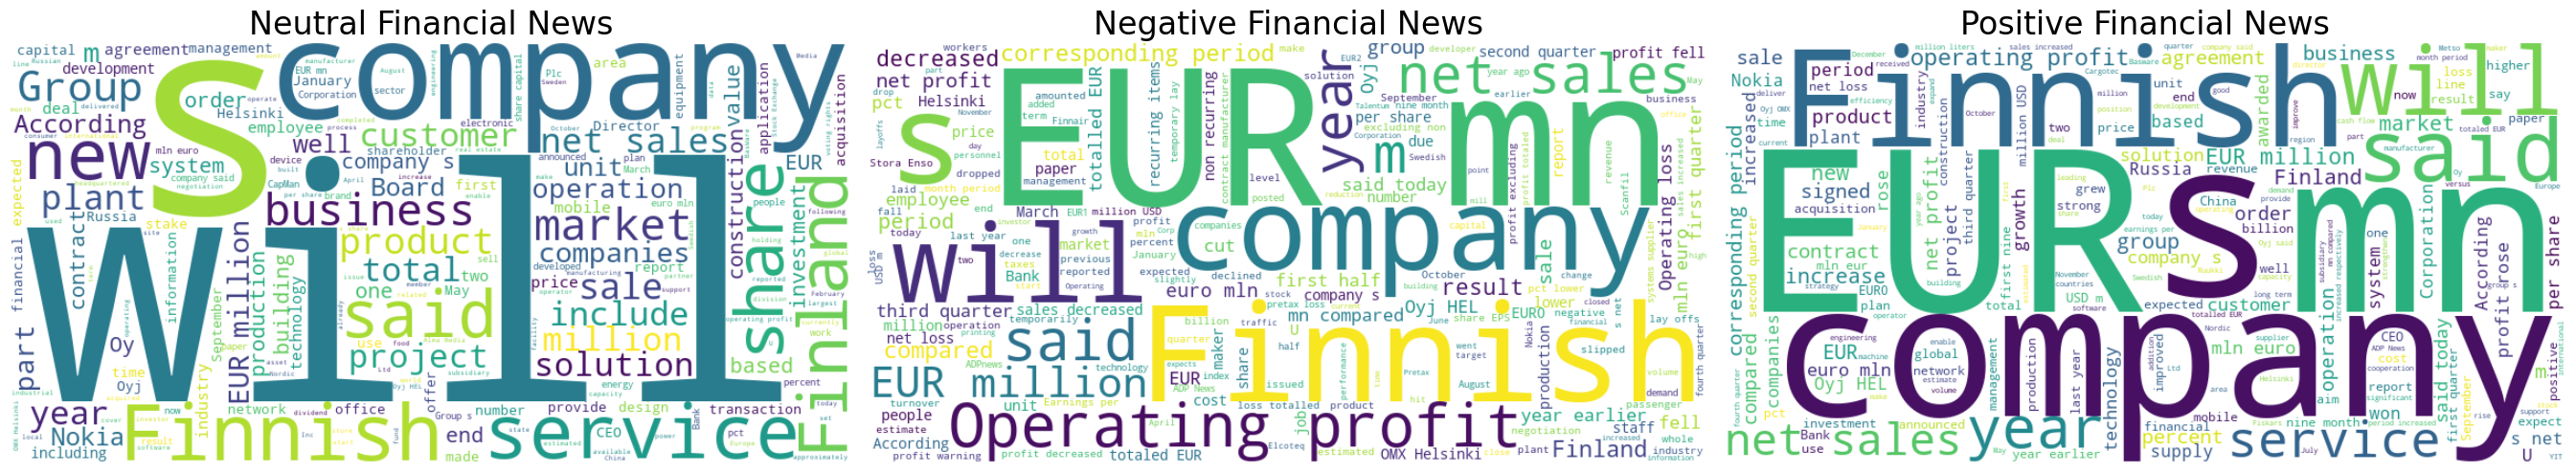

In [57]:
visual.generate_word_cloud_by_sentiment(df=simple_cleaned_corpora, text_column=text_column, sentiment_col=sentiment_col)

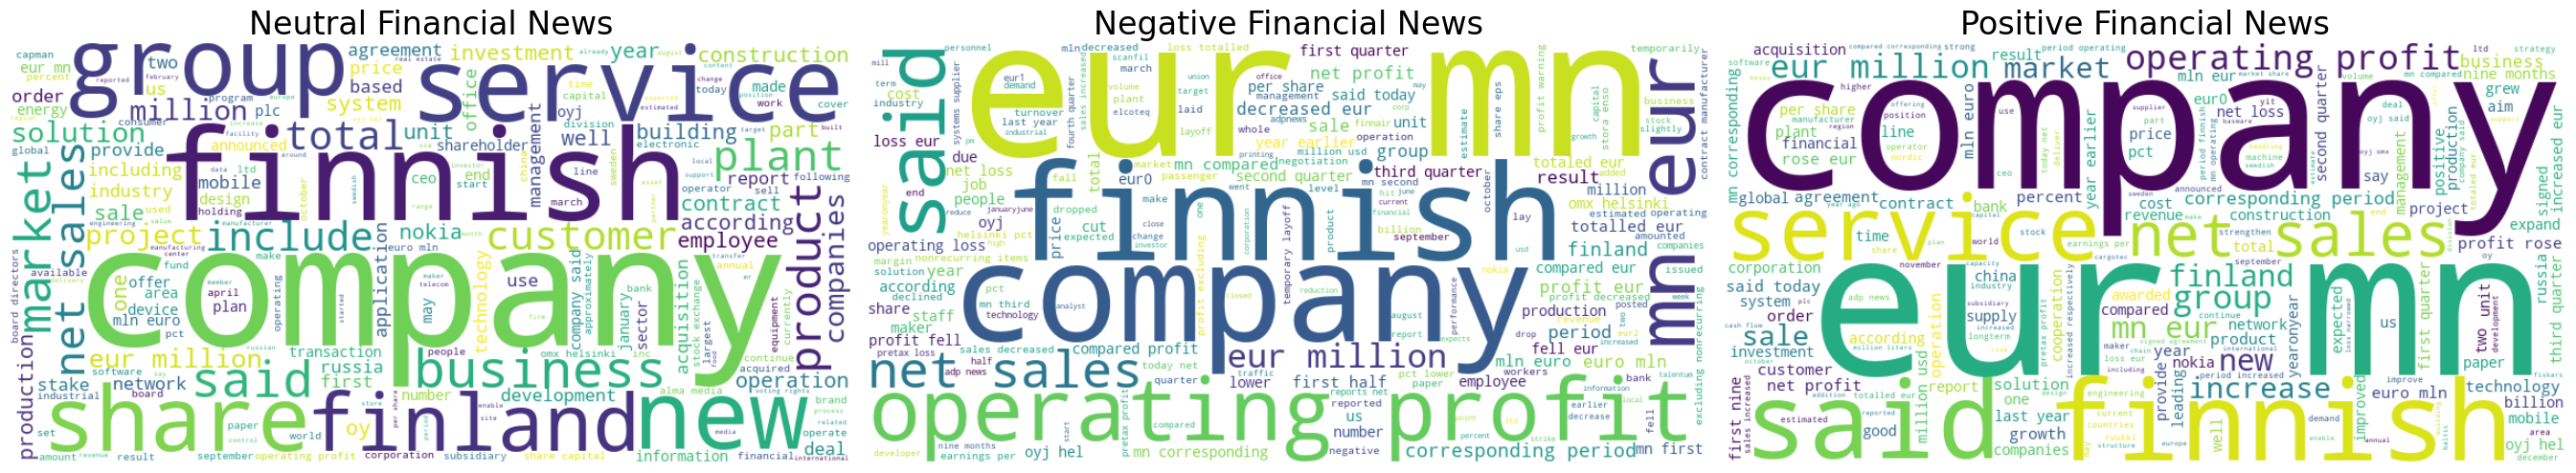

In [58]:
visual.generate_word_cloud_by_sentiment(df=simple_cleaned_corpora, text_column=clean_column_name, sentiment_col=sentiment_col)

## Task2: Pre-processing

Preprocesses text data in a DataFrame column:

    - Removes rows where the target column is null, empty, or whitespace-only
    - Converts text to lowercase and strips spaces
    - Processes text with spaCy
    - Cleans text using `clean_text` which removes stopwords and punctuation.
    - Adds a new column 'new_<target_column>' with processed text

In [63]:
corpora_no_cleaning = corpora.copy()

In [65]:
corpora_no_cleaning.head()

news  \
0                                                                          According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .   
1           Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .   
2  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...   
3  With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...   
4  According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ...   

  sentiment  
0   neutral  
1   neutral  
2  negative  
3  positive  
4  positive

Text Preprocessing Complete:
- Original rows: 4846
- Rows after removing empty text: 4842
- New column created: 'cleaned_news'



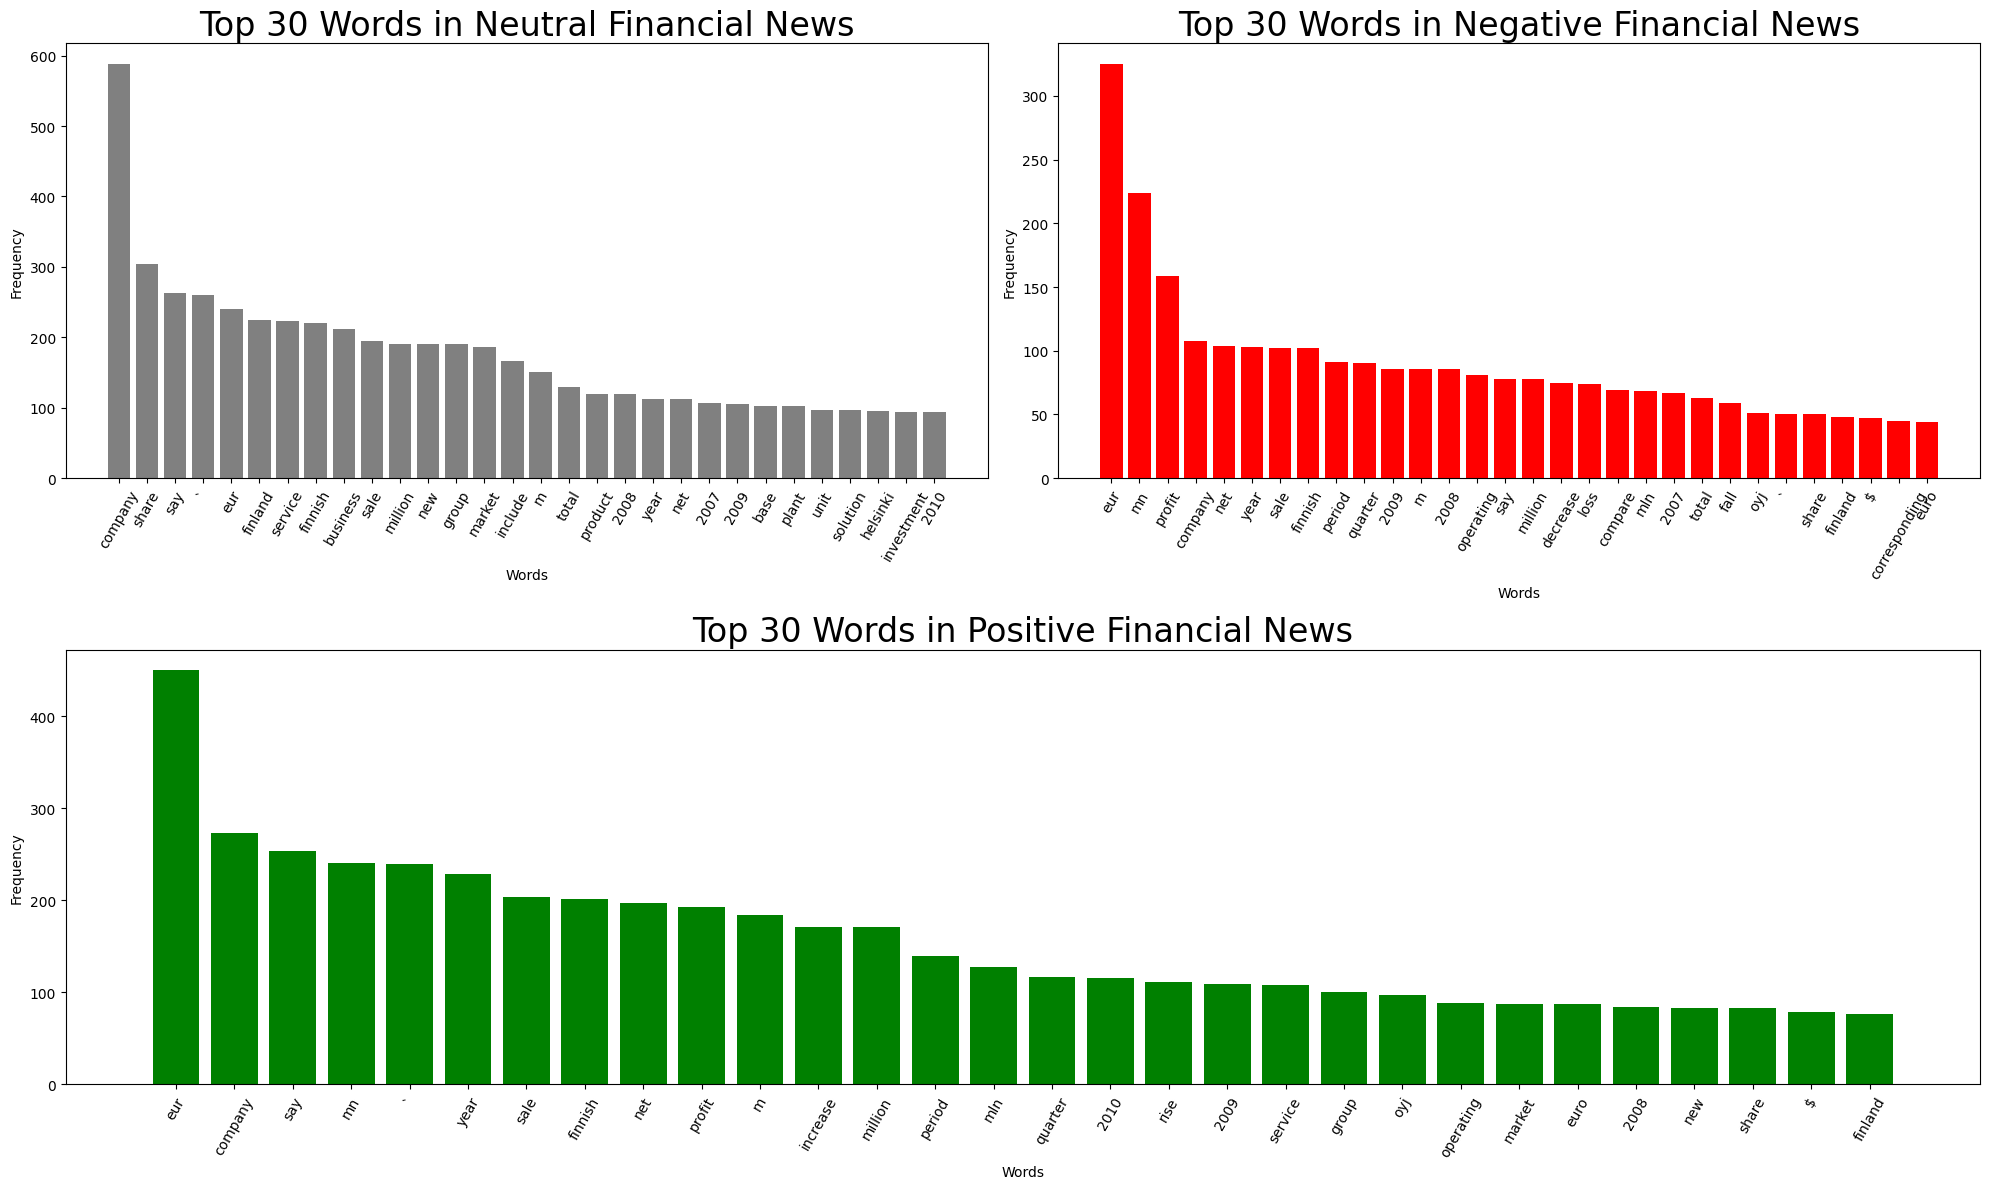

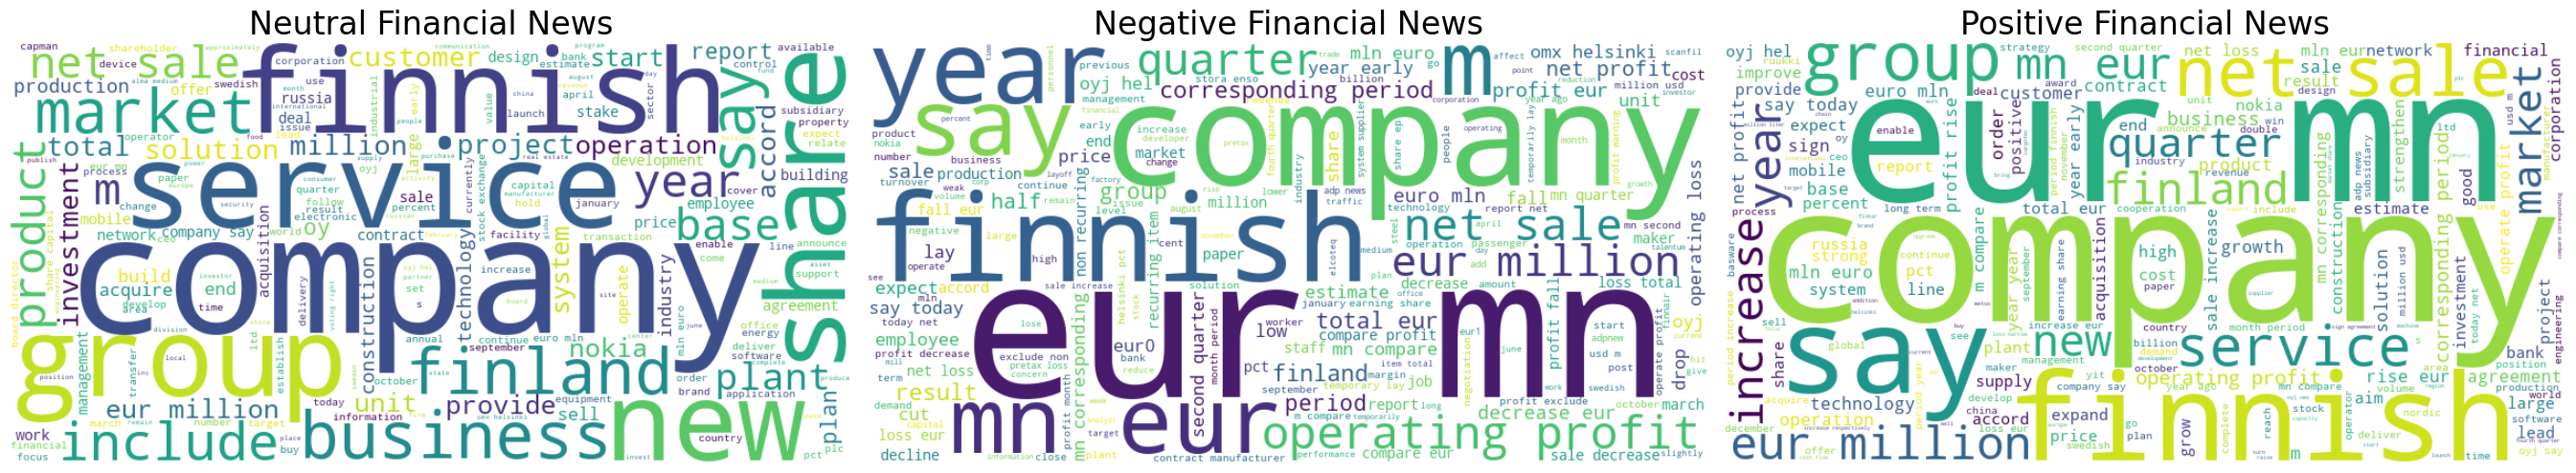

Preprocessing Pipeline Summary
------------------------------
Initial row count: 4846
Duplicates before cleaning: 6
Duplicates after cleaning:  21
Final row count after cleaning and deduplication: 4820
Processed text column: 'cleaned_news'
Label encoding applied: 'sentiment'

CPU times: user 13.3 s, sys: 487 ms, total: 13.8 s
Wall time: 13.8 s


In [67]:
%%time
corpora_after_cleaning, processed_col = preprocessing.preprocess(df=corpora_no_cleaning, text_column=text_column, label_column=sentiment_col, apply_cleaning=True)

In [68]:
corpora_after_cleaning

news  \
0                                                                             According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .   
1              Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .   
2     The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...   
3     With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...   
4     According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ...   
...                                                                                                                                                                                                       ...   
4841                                                         LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .   
4842                                                     Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .   
4843                                                                                             Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .   
4844  Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose t...   
4845                                                                                                          Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .   

     sentiment  \
0      neutral   
1      neutral   
2     negative   
3     positive   
4     positive   
...        ...   
4841  negative   
4842   neutral   
4843  negative   
4844  negative   
4845  negative   

                                                                                                                                                                cleaned_news  
0                                                                                                                    accord gran company plan production russia company grow  
1                                       technopolis plan develop stage area 100,000 square meter order host company work computer technology telecommunication statement say  
2        international electronic industry company elcoteq lay ten employee tallinn facility contrary early layoff company contract rank office worker daily postimee report  
3                                      new production plant company increase capacity meet expect increase demand improve use raw material increase production profitability  
4                                  accord company update strategy year 2009 2012 basware target long term net sale growth range 20 -40 operate profit margin 10 -20 net sale  
...                                                                                                                                                                      ...  
4841                                                           london marketwatch share price end lower london monday rebound bank stock fail offset broad weakness ftse 100  
4842                                                             rinkuskiai

## Task3: Text classification

Text Preprocessing Complete:
- Original rows: 4846
- Rows after removing empty text: 4842
- New column created: 'cleaned_news'



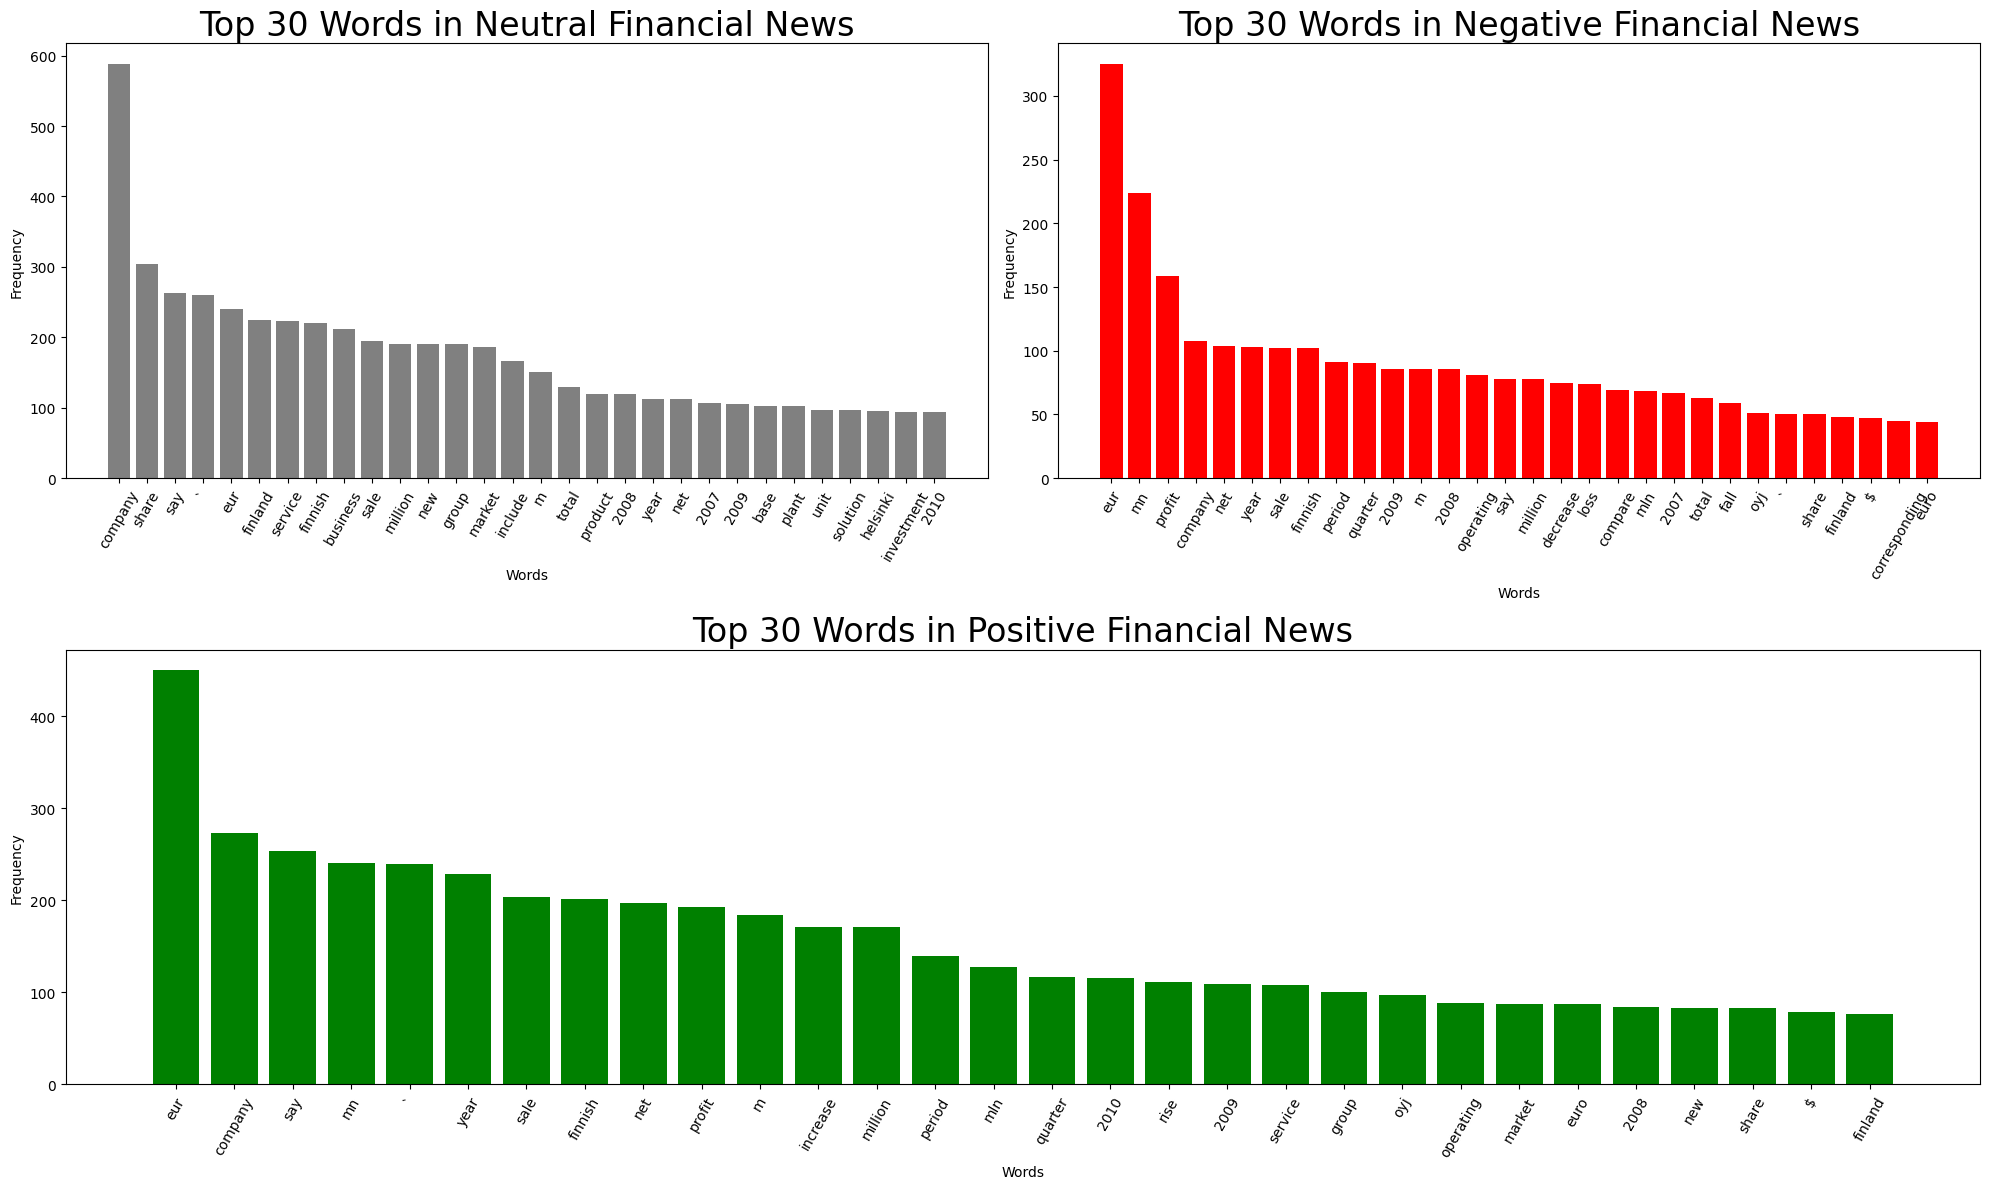

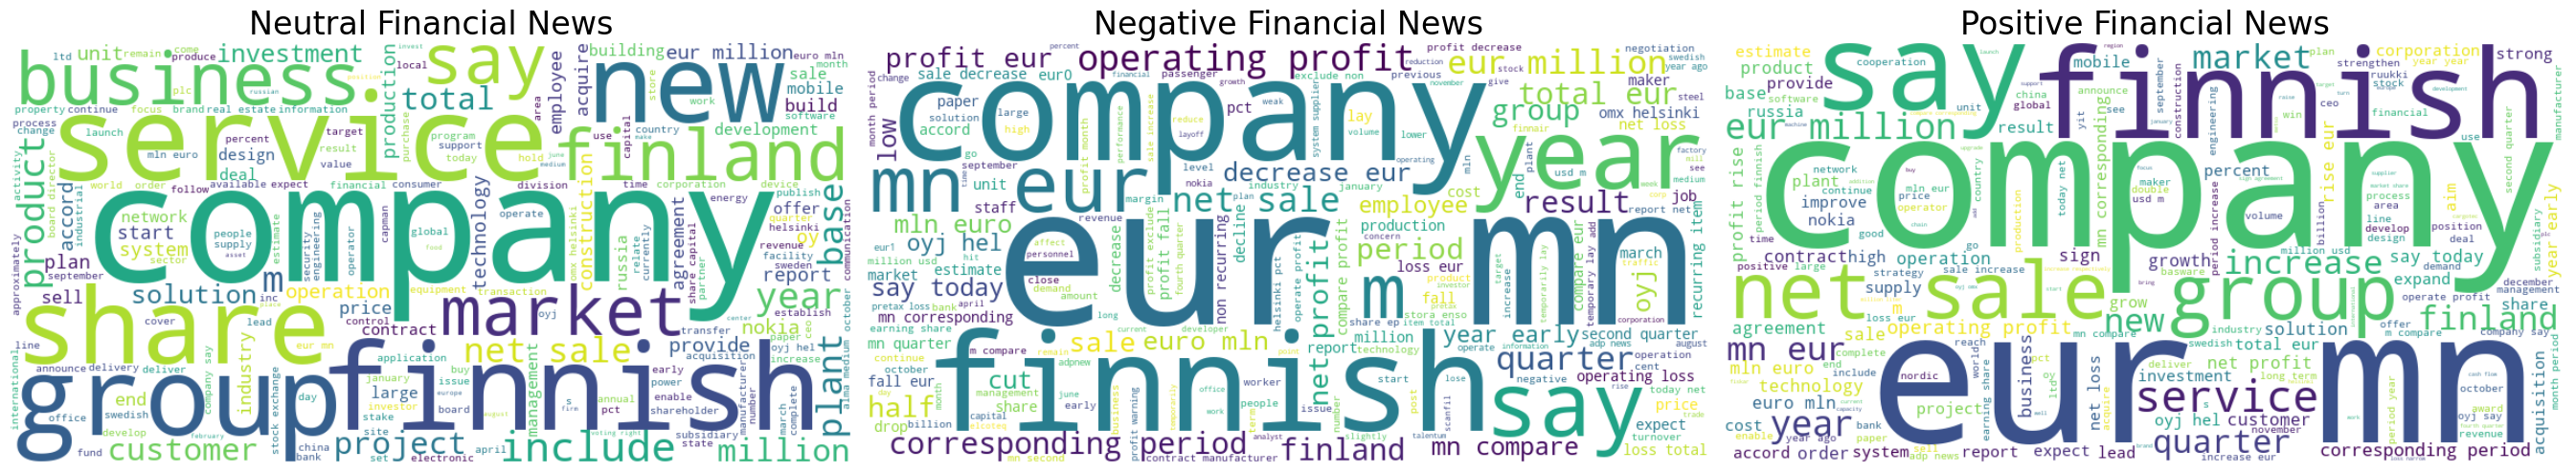

Preprocessing Pipeline Summary
------------------------------
Initial row count: 4846
Duplicates before cleaning: 6
Duplicates after cleaning:  21
Final row count after cleaning and deduplication: 4820
Processed text column: 'cleaned_news'
Label encoding applied: 'sentiment'

CPU times: user 12.9 s, sys: 504 ms, total: 13.4 s
Wall time: 13.4 s


In [70]:
%%time 
X_train_vec, y_train, X_test_vec, y_test = preprocessing.run_pipeline_process_and_vectorize_data(df=corpora, text_column=text_column, 
                                    label_column=sentiment_col, vectorizer_method='count', apply_cleaning=True, test_size=0.3, random_state=42)

In [71]:
X_train_vec.shape, y_train.shape

((3374, 6888), (3374,))

In [96]:
X_train_vec.shape

(3374, 6888)

## Train model

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay

### Naive Bayes

In [75]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predictions and evaluation
nb_preds = nb_model.predict(X_test_vec)

### Classification Reports

In [77]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.49      0.54       181
           0       0.76      0.83      0.79       856
           1       0.58      0.53      0.55       409

    accuracy                           0.70      1446
   macro avg       0.65      0.61      0.63      1446
weighted avg       0.69      0.70      0.69      1446



### Logistic Regression

In [79]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

# Predictions and evaluation
lr_preds= lr_model.predict(X_test_vec)

### Classification Reports

In [81]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.56      0.63       181
           0       0.77      0.87      0.82       856
           1       0.65      0.55      0.59       409

    accuracy                           0.74      1446
   macro avg       0.71      0.66      0.68      1446
weighted avg       0.73      0.74      0.73      1446



### Confusion Matrix

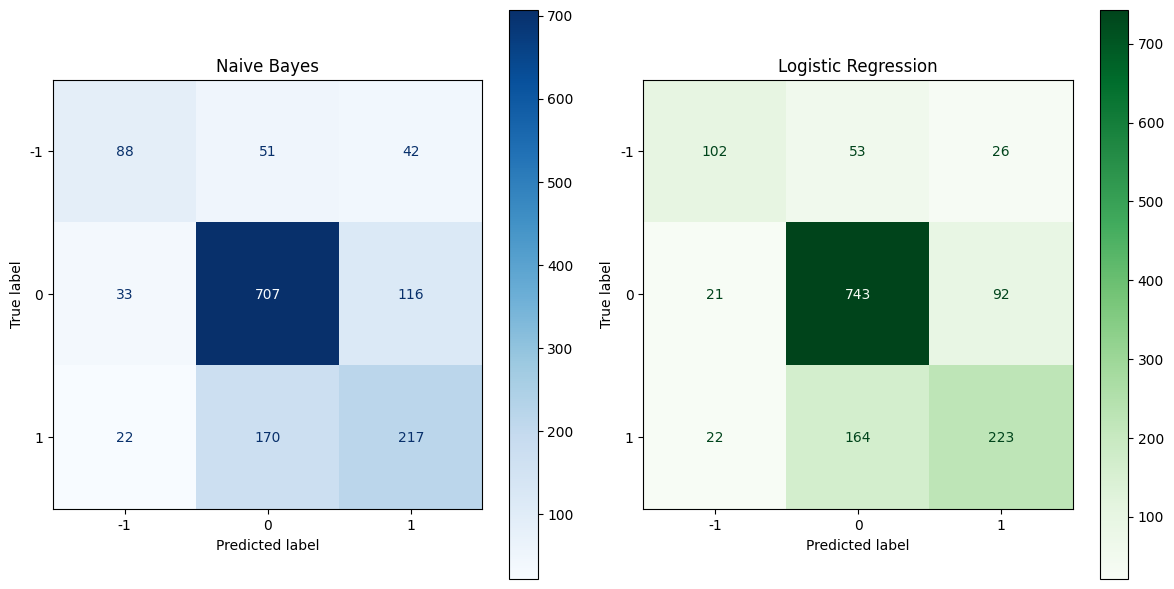

In [83]:
# Plot confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay.from_estimator(nb_model, X_test_vec, y_test, ax=axes[0], cmap="Blues")
axes[0].title.set_text('Naive Bayes')

ConfusionMatrixDisplay.from_estimator(lr_model, X_test_vec, y_test, ax=axes[1], cmap="Greens")
axes[1].title.set_text('Logistic Regression')

plt.tight_layout()
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder

In [122]:
corpora

news  \
0                                                                             According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .   
1              Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .   
2     The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...   
3     With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...   
4     According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ...   
...                                                                                                                                                                                                       ...   
4841                                                         LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .   
4842                                                     Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .   
4843                                                                                             Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .   
4844  Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose t...   
4845                                                                                                          Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .   

     sentiment  
0      neutral  
1      neutral  
2     negative  
3     positive  
4     positive  
...        ...  
4841  negative  
4842   neutral  
4843  negative  
4844  negative  
4845  negative  

[4846 rows x 2 columns]

In [120]:
data =corpora.copy()
label_encoder = LabelEncoder()
data[sentiment_col] = label_encoder.fit_transform(data[sentiment_col])
data

news  \
0                                                                             According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .   
1              Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .   
2     The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...   
3     With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...   
4     According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ...   
...                                                                                                                                                                                                       ...   
4841                                                         LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .   
4842                                                     Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .   
4843                                                                                             Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .   
4844  Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose t...   
4845                                                                                                          Sales in Finland decreased by 10.5 % in January , while sales outside Finland dropped by 17 % .   

      sentiment  
0             1  
1             1  
2             0  
3             2  
4             2  
...         ...  
4841          0  
4842          1  
4843          0  
4844          0  
4845          0  

[4846 rows x 2 columns]

In [156]:
print(label_encoder.classes_)

['negative' 'neutral' 'positive']


In [154]:
label_encoder.transform(label_encoder.classes_)

array([0, 1, 2])

In [166]:
list(range(1, len([1,2,3, 4])))

[1, 2, 3]